# Aula Hands-on Ciência de Dados (Fechamento do Semestre)

Esse [Mapa Mental](https://notebooklm.google.com/notebook/db262d3f-e3ae-4f01-9d5a-53a5ef310742), apresenta o conteúdo ministrado neste semestre com relação aos estudos de estatística e métodos para análise de dados.

# Vamos iniciar falando sobre a análise de frequencia

| Tipo                           | Descrição                                                   |
| ------------------------------ | ----------------------------------------------------------- |
| **Frequência absoluta (fi)**   | Número de vezes que um valor aparece.                       |
| **Frequência relativa (fr)**   | Proporção do valor em relação ao total. $fr = \frac{fi}{n} * 100$ |
| **Frequência acumulada (Fac)** | Soma das frequências até aquele ponto.                      |


## Exemplo 1:

Uma cafeteria registrou, durante 30 dias, quantos cafés foram vendidos por dia.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


vendas = np.array([35, 28, 34, 38, 40, 37, 41, 33, 36, 29,
          31, 32, 34, 39, 40, 30, 29, 36, 32, 33,
          35, 37, 39, 40, 38, 36, 35, 37, 34, 36])
vendas

array([35, 28, 34, 38, 40, 37, 41, 33, 36, 29, 31, 32, 34, 39, 40, 30, 29,
       36, 32, 33, 35, 37, 39, 40, 38, 36, 35, 37, 34, 36])

In [3]:
# Frequência absoluta
freq_abs = pd.Series(vendas).value_counts().sort_index()
freq_abs

28    1
29    2
30    1
31    1
32    2
33    2
34    3
35    3
36    4
37    3
38    2
39    2
40    3
41    1
Name: count, dtype: int64

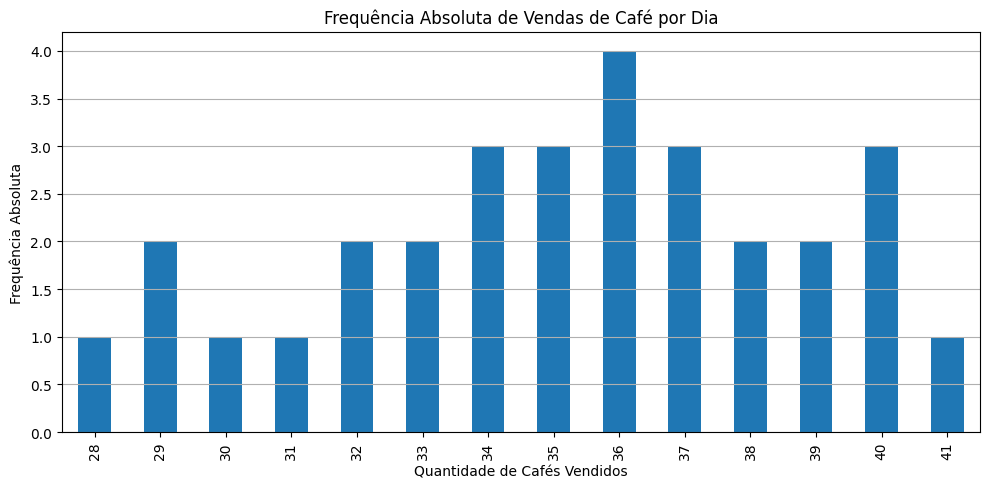

In [10]:
# Gráfico de barras da frequência absoluta
plt.figure(figsize=(10, 5))
freq_abs.plot(kind='bar')
plt.title("Frequência Absoluta de Vendas de Café por Dia")
plt.xlabel("Quantidade de Cafés Vendidos")
plt.ylabel("Frequência Absoluta")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [12]:
# Frequência relativa
freq_rel = (freq_abs / len(vendas))*100
freq_rel

28     3.333333
29     6.666667
30     3.333333
31     3.333333
32     6.666667
33     6.666667
34    10.000000
35    10.000000
36    13.333333
37    10.000000
38     6.666667
39     6.666667
40    10.000000
41     3.333333
Name: count, dtype: float64

In [13]:
# Frequência acumulada
freq_acum = freq_abs.cumsum()
freq_acum

28     1
29     3
30     4
31     5
32     7
33     9
34    12
35    15
36    19
37    22
38    24
39    26
40    29
41    30
Name: count, dtype: int64

In [15]:
# Tabela
tabela_freq = pd.DataFrame({
    "Qtd de Cafés": freq_abs.index,
    "Frequência Absoluta": freq_abs.values,
    "Frequência Relativa (%)": (freq_rel.values).round(2),
    "Frequência Acumulada": freq_acum.values
})

tabela_freq.reset_index(drop=True, inplace=True)
tabela_freq

,Qtd de Cafés,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada
0,28,1,3.33,1
1,29,2,6.67,3
2,30,1,3.33,4
3,31,1,3.33,5
4,32,2,6.67,7
5,33,2,6.67,9
6,34,3,10.00,12
7,35,3,10.00,15
8,36,4,13.33,19
9,37,3,10.00,22


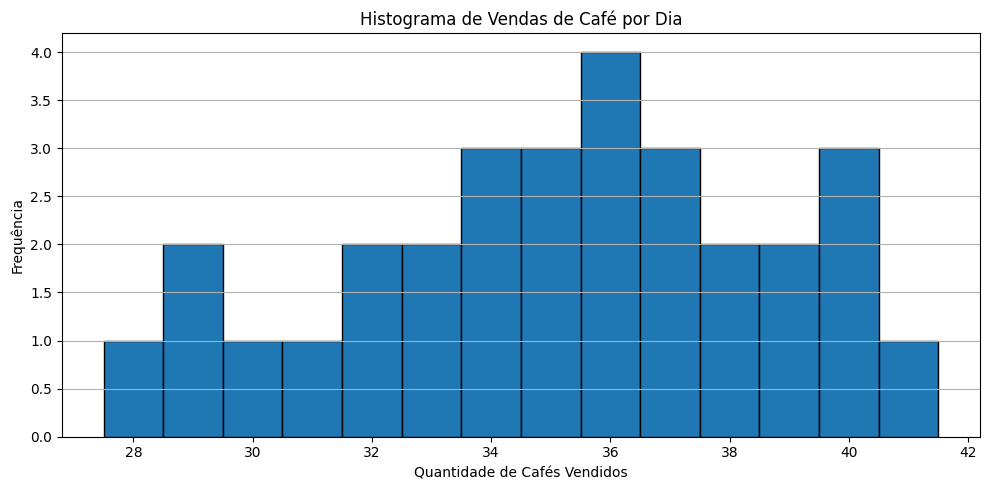

In [11]:
# Histograma das vendas
plt.figure(figsize=(10, 5))
plt.hist(vendas, bins=range(min(vendas), max(vendas)+2), edgecolor='black', align='left')
plt.title("Histograma de Vendas de Café por Dia")
plt.xlabel("Quantidade de Cafés Vendidos")
plt.ylabel("Frequência")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Perguntas:
- Em quantos dias venderam menos que 30 cafés?
- Qual a proporção de dias em que venderam 40 ou mais cafés?
- Qual a frequência acumulada até 35 cafés?
- Qual foi a quantidade de cafés mais vendida?
- Quantos dias venderam entre 33 e 37 cafés (inclusive)?

In [25]:
# Dias com menos de 30 cafés
p1 = (vendas < 30).sum()

# Proporção de dias com 40 ou mais cafés
p2 = ((vendas >= 40).sum() / len(vendas)) * 100

# Frequência acumulada até 35 cafés
p3 = (vendas <= 35).sum()

moda = stats.mode(vendas, keepdims=True)
# Moda (valor mais frequente)
p4 = moda.mode[0]

# Dias com vendas entre 33 e 37 (inclusive)
p5 = ((vendas >= 33) & (vendas <= 37)).sum()

In [27]:
respostas = {
    "Dias com < 30 cafés": p1,
    "Proporção com >= 40 cafés (%)": round(p2, 2),
    "Freq. acumulada até 35 cafés": p3,
    "Moda (qtd. mais vendida)": p4,
    "Dias com vendas entre 33 e 37": p5
}

# Exibir como DataFrame
df_respostas = pd.DataFrame([respostas])
df_respostas

,Dias com < 30 cafés,Proporção com >= 40 cafés (%),Freq. acumulada até 35 cafés,Moda (qtd. mais vendida),Dias com vendas entre 33 e 37
0,3,13.33,15,36,15


## 🧪 PROBLEMA 1 – Qualitativa Nominal (Teste do Qui-quadrado)

🎯 Problema:
Queremos saber se a preferência por tipo de transporte (carro, ônibus, bicicleta) é diferente entre dois bairros da cidade.

In [29]:
!pwd

/Users/claytonpereira/Aulas_Unesp/ds/aulas25/DS_Unesp/aulas/exemplos
